In [1]:
import pandas as pd
from rouge import Rouge
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_excel("./Experiment2.xlsx", names = ["paras", "0min", "50min", "100min", "wiki"])

In [3]:
paras1 = [d.replace("\n\n\n", "\n\n").replace("\n\n", "\n").replace("\\", "").split("\n") for d in data1["paras"]]
rouge = Rouge()

In [4]:
rouge1_para_max_data1 = []
rouge2_para_max_data1 = []

rouge1_para_avg_data1 = []
rouge2_para_avg_data1 = []

rouge1_para_max_data1 = []
rouge2_para_max_data1 = []

rouge1_para_avg_data1 = []
rouge2_para_avg_data1 = []

summary_r1 = []
summary_p1 = []
summary_f1 = []

summary_r2 = []
summary_p2 = []
summary_f2 = []

for i in range(len(data1.index)):
    

    q = data1.index[i]
    paragraphs = paras1[i]
    min0 = data1["0min"][i]
    min50 = data1["50min"][i]
    min100 = data1["100min"][i]
    wiki = data1["wiki"][i]

    para_r_r1 = []
    para_p_r1 = []
    para_f_r1 = []

    para_r_r2 = []
    para_p_r2 = []
    para_f_r2 = []

    for p in paragraphs:
        r1 = rouge.get_scores(p, wiki)[0]["rouge-1"]
        r2 = rouge.get_scores(p, wiki)[0]["rouge-2"]

        para_r_r1.append(r1["r"])
        para_p_r1.append(r1["p"])
        para_f_r1.append(r1["f"])

        para_r_r2.append(r2["r"])
        para_p_r2.append(r2["p"])
        para_f_r2.append(r2["f"])

    max_rouge1_r = max(para_r_r1)
    max_rouge1_p = max(para_p_r1)
    max_rouge1_f = max(para_f_r1)

    avg_rouge1_r = sum(para_r_r1) / len(para_r_r1)
    avg_rouge1_p = sum(para_p_r1) / len(para_p_r1)
    avg_rouge1_f = sum(para_f_r1) / len(para_f_r1)

    max_rouge2_r = max(para_r_r2)
    max_rouge2_p = max(para_p_r2)
    max_rouge2_f = max(para_f_r2)

    avg_rouge2_r = sum(para_r_r2) / len(para_r_r2)
    avg_rouge2_p = sum(para_p_r2) / len(para_p_r2)
    avg_rouge2_f = sum(para_f_r2) / len(para_f_r2)

    row_rouge1 = [max_rouge1_r, max_rouge1_p, max_rouge1_f, avg_rouge1_r, avg_rouge1_p, avg_rouge1_f]
    row_rouge2 = [max_rouge2_r, max_rouge2_p, max_rouge2_f, avg_rouge2_r, avg_rouge2_p, avg_rouge2_f]
    
    rouge1_para_max_data1.append([max_rouge1_r, max_rouge1_p, max_rouge1_f])
    rouge2_para_max_data1.append([max_rouge2_r, max_rouge2_p, max_rouge2_f])
    
    rouge1_para_avg_data1.append([avg_rouge1_r, avg_rouge1_p, avg_rouge1_f])
    rouge2_para_avg_data1.append([avg_rouge2_r, avg_rouge2_p, avg_rouge2_f])
    
    summary_r1.append([rouge.get_scores(min0, wiki)[0]["rouge-1"]["r"], rouge.get_scores(min50, wiki)[0]["rouge-1"]["r"], rouge.get_scores(min100, wiki)[0]["rouge-1"]["r"]])
    summary_f1.append([rouge.get_scores(min0, wiki)[0]["rouge-1"]["f"], rouge.get_scores(min50, wiki)[0]["rouge-1"]["f"], rouge.get_scores(min100, wiki)[0]["rouge-1"]["f"]])
    summary_p1.append([rouge.get_scores(min0, wiki)[0]["rouge-1"]["p"], rouge.get_scores(min50, wiki)[0]["rouge-1"]["p"], rouge.get_scores(min100, wiki)[0]["rouge-1"]["p"]])
    
    summary_r2.append([rouge.get_scores(min0, wiki)[0]["rouge-2"]["r"], rouge.get_scores(min50, wiki)[0]["rouge-2"]["r"], rouge.get_scores(min100, wiki)[0]["rouge-2"]["r"]])
    summary_f2.append([rouge.get_scores(min0, wiki)[0]["rouge-2"]["f"], rouge.get_scores(min50, wiki)[0]["rouge-2"]["f"], rouge.get_scores(min100, wiki)[0]["rouge-2"]["f"]])
    summary_p2.append([rouge.get_scores(min0, wiki)[0]["rouge-2"]["p"], rouge.get_scores(min50, wiki)[0]["rouge-2"]["p"], rouge.get_scores(min100, wiki)[0]["rouge-2"]["p"]])

<AxesSubplot:title={'center':'Average ROUGE-1 Statistics'}>

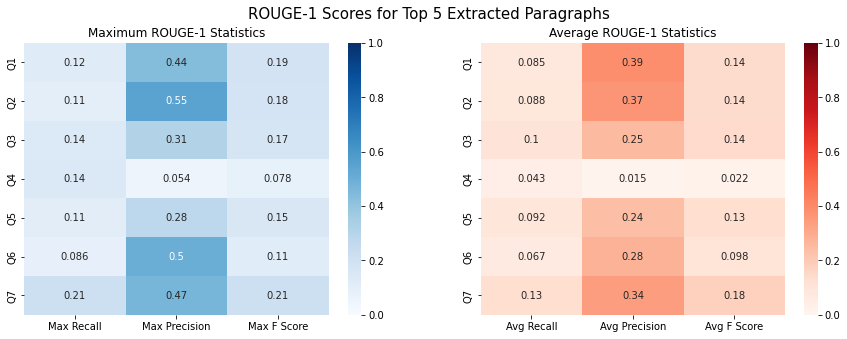

In [5]:
df = pd.DataFrame(rouge1_para_max_data1, index = data1.index, columns = ["Max Recall", "Max Precision", "Max F Score"])
df1 = pd.DataFrame(rouge1_para_avg_data1, index = data1.index, columns = ["Avg Recall", "Avg Precision", "Avg F Score"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("ROUGE-1 Scores for Top 5 Extracted Paragraphs", fontsize = 15)

ax1.set_title('Maximum ROUGE-1 Statistics')
ax2.set_title('Average ROUGE-1 Statistics')

sns.heatmap(df, annot=True, vmin = 0, vmax = 1, cmap="Blues", yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax1)
sns.heatmap(df1, annot=True, vmin = 0, vmax = 1, cmap="Reds", yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax2)

<AxesSubplot:title={'center':'Average ROUGE-2 Statistics'}>

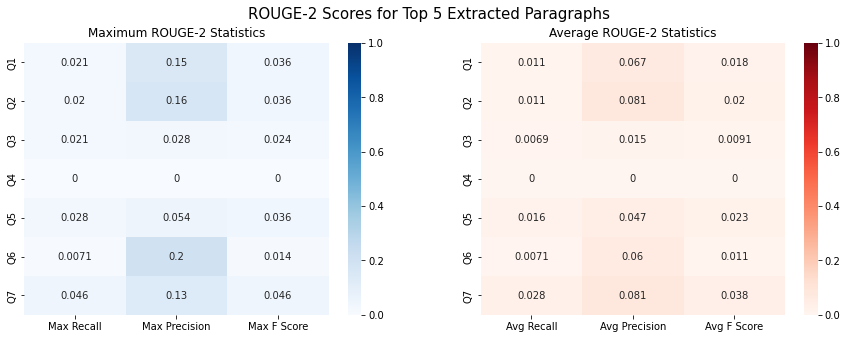

In [6]:
df = pd.DataFrame(rouge2_para_max_data1, index = data1.index, columns = ["Max Recall", "Max Precision", "Max F Score"])
df1 = pd.DataFrame(rouge2_para_avg_data1, index = data1.index, columns = ["Avg Recall", "Avg Precision", "Avg F Score"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("ROUGE-2 Scores for Top 5 Extracted Paragraphs", fontsize = 15)

ax1.set_title('Maximum ROUGE-2 Statistics')
ax2.set_title('Average ROUGE-2 Statistics')

sns.heatmap(df, annot=True, vmin = 0, vmax = 1, cmap="Blues", yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax1)
sns.heatmap(df1, annot=True, vmin = 0, vmax = 1, cmap="Reds", yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax2)

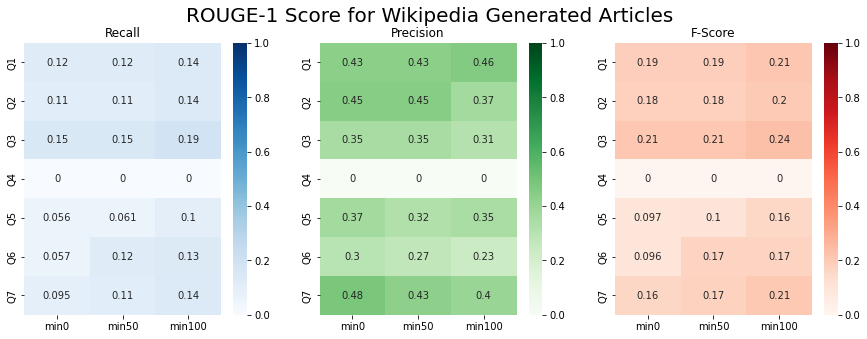

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("ROUGE-1 Score for Wikipedia Generated Articles", fontsize = 20)

ax1.set_title('Recall')
ax2.set_title('Precision')
ax3.set_title('F-Score')

sns.heatmap(pd.DataFrame(summary_r1), annot=True, vmin = 0, vmax = 1, cmap="Blues", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax1)
sns.heatmap(pd.DataFrame(summary_p1), annot=True, vmin = 0, vmax = 1, cmap="Greens", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax2)
sns.heatmap(pd.DataFrame(summary_f1), annot=True, vmin = 0, vmax = 1, cmap="Reds", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax3)

plt.show()

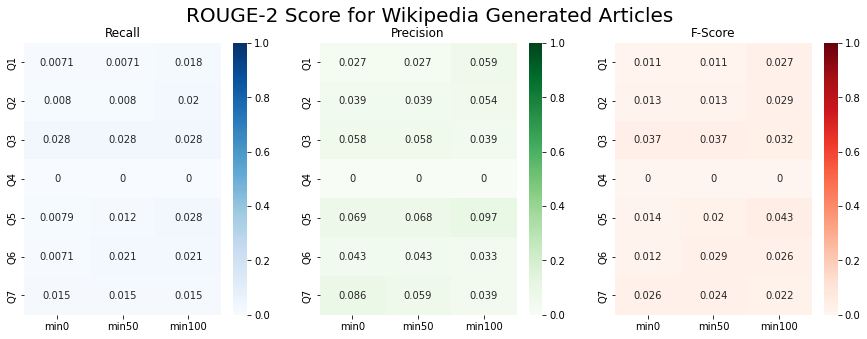

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("ROUGE-2 Score for Wikipedia Generated Articles", fontsize = 20)

ax1.set_title('Recall')
ax2.set_title('Precision')
ax3.set_title('F-Score')

sns.heatmap(pd.DataFrame(summary_r2), annot=True, vmin = 0, vmax = 1, cmap="Blues", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax1)
sns.heatmap(pd.DataFrame(summary_p2), annot=True, vmin = 0, vmax = 1, cmap="Greens", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax2)
sns.heatmap(pd.DataFrame(summary_f2), annot=True, vmin = 0, vmax = 1, cmap="Reds", xticklabels = ["min0", "min50", "min100"], yticklabels = [f"Q{i + 1}" for i in range(7)], ax = ax3)

plt.show()